# Early Decoding


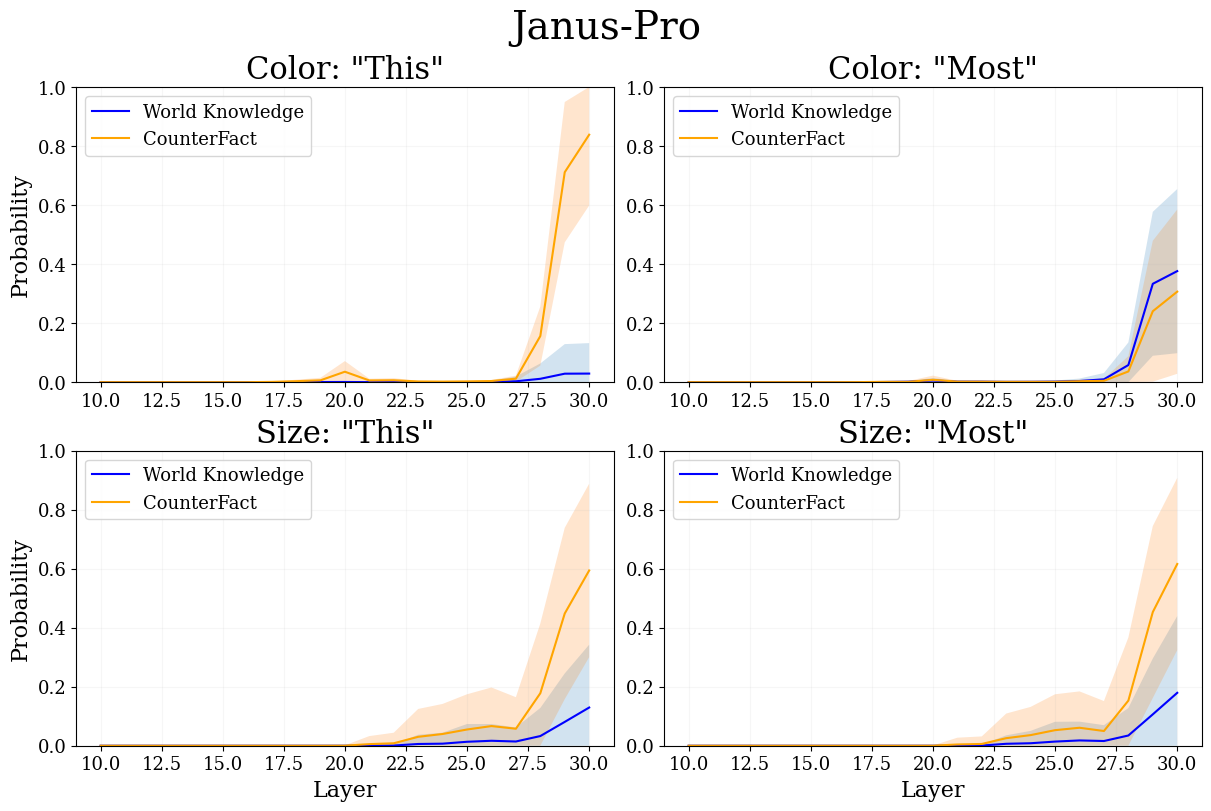

In [3]:
import os
import pickle
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["DejaVu Serif"]

base_path = "../multimodal_MI/visual_counterfact/"

# ─── Configuration ─────────────────────────────────────────────────────────────
model_name = 'janus'

start_layer = 10

# Fonts
axis_fs   = 16
legend_fs = 13
tick_fs   = 13
title_fs  = 22

# ─── Helpers ───────────────────────────────────────────────────────────────────
def load_answers(path):
    """Load a pickle mapping and split it into two halves."""
    with open(path, 'rb') as f:
        data = pickle.load(f)
    items = list(data.items())
    half = len(items) // 2
    return dict(items[:half]), dict(items[half:])

def pairwise_average(dict1, dict2):
    """Average matching entries (by position) in two dicts."""
    avg = {}
    for i, ((_, v1), (_, v2)) in enumerate(zip(dict1.items(), dict2.items())):
        avg[i] = {
            'prob_correct':    [(a + b) / 2 for a, b in zip(v1['prob_correct'],    v2['prob_correct'])],
            'prob_counterfact':[(a + b) / 2 for a, b in zip(v1['prob_counterfact'],v2['prob_counterfact'])]
        }
    return avg

def compute_stats(answer_dict):
    """Return x, mean_correct, std_correct, mean_cf, std_cf for layers ≥ start_layer."""
    all_c  = np.array([v['prob_correct']    for v in answer_dict.values()])
    all_cf = np.array([v['prob_counterfact'] for v in answer_dict.values()])
    mean_c  = all_c.mean(axis=0)[start_layer:]
    std_c   = all_c.std(axis=0)[start_layer:]
    mean_cf = all_cf.mean(axis=0)[start_layer:]
    std_cf  = all_cf.std(axis=0)[start_layer:]
    x = list(range(start_layer, start_layer + len(mean_c)))
    return x, mean_c, std_c, mean_cf, std_cf

# ─── File paths ────────────────────────────────────────────────────────────────
files = {
    'Color: "This"':      os.path.join(base_path, f'new_color_early_decoding_results_counterfact_{model_name}.pickle'),
    'Color: "Most"':   os.path.join(base_path, f'most_new_color_early_decoding_results_most_counterfact_{model_name}.pickle'),
    'Size: "This"':      os.path.join(base_path, f'new_size_early_decoding_results_counterfact_{model_name}.pickle'),
    'Size: "Most"':   os.path.join(base_path, f'new_size_early_decoding_results_most_counterfact_{model_name}.pickle'),
}

# ─── Load & process ────────────────────────────────────────────────────────────
stats = {}
for title, path in files.items():
    d1, d2 = load_answers(path)
    avg    = pairwise_average(d1, d2)
    stats[title] = compute_stats(avg)

# ─── Plotting ─────────────────────────────────────────────────────────────────
fig, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
plot_order = [
    ('Color: "This"',    axs[0,0]),
    ('Color: "Most"', axs[0,1]),
    ('Size: "This"',    axs[1,0]),
    ('Size: "Most"', axs[1,1]),
]

for key, ax in plot_order:
    x, mc, sc, mcf, scf = stats[key]
    ax.plot(x, mc,  label='World Knowledge', color='blue')
    ax.fill_between(x, np.clip(mc - sc, 0, 1), np.clip(mc + sc, 0, 1), alpha=0.2)
    ax.plot(x, mcf, label='CounterFact',      color='orange')
    ax.fill_between(x, np.clip(mcf - scf,0,1), np.clip(mcf + scf,0,1), alpha=0.2)

    ax.set_title(key,       fontsize=title_fs)

    # Add y-label only to first column (i.e., column index 0)
    if ax in [axs[0,0], axs[1,0]]:
        ax.set_ylabel('Probability', fontsize=axis_fs)

    # Add x-label only to second row (i.e., row index 1)
    if ax in [axs[1,0], axs[1,1]]:
        ax.set_xlabel('Layer', fontsize=axis_fs)
    #ax.set_xlabel('Layer',  fontsize=axis_fs)
    #ax.set_ylabel('Probability', fontsize=axis_fs)
    ax.set_ylim(0,1)

    
    ax.tick_params(axis='both', labelsize=tick_fs)
    ax.legend(fontsize=legend_fs, loc='upper left')
    ax.grid(True, alpha=0.1)

# ─── Save & show ───────────────────────────────────────────────────────────────
plt.suptitle("Janus-Pro", fontsize=28)
out_fname = f'early_decoding_{model_name}.png'

plt.savefig(out_fname, dpi=300)
plt.show()


# Attention - Mass Plots

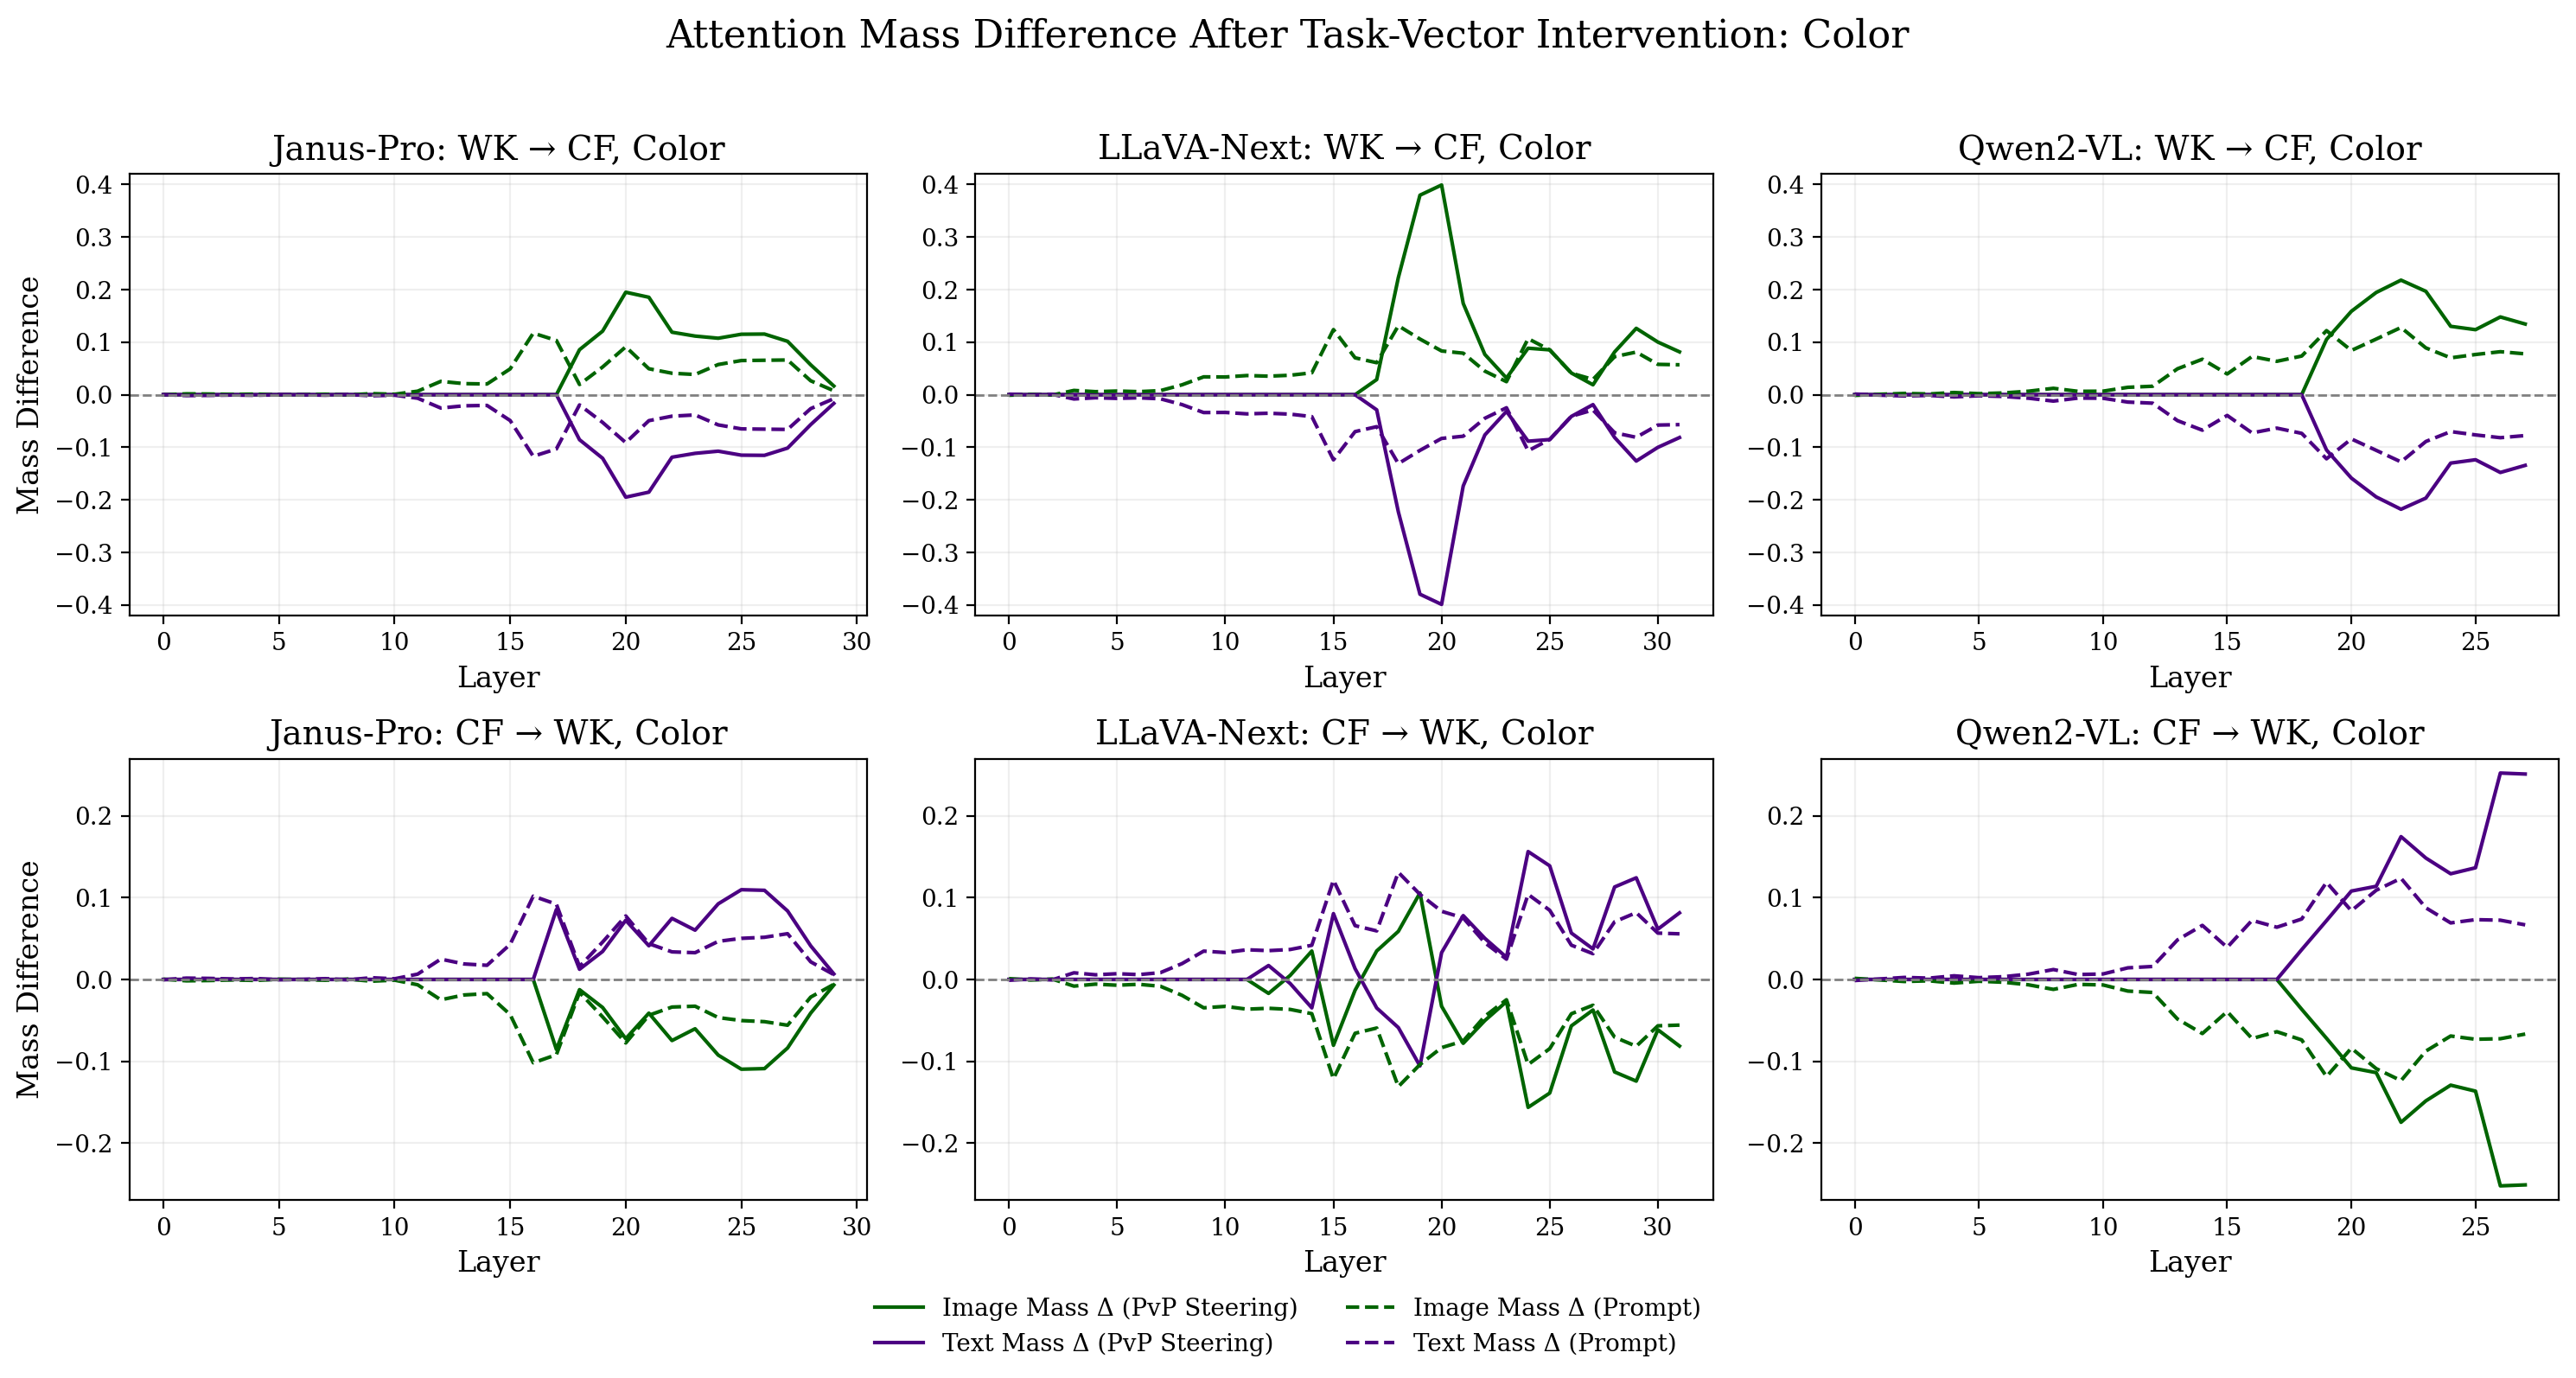

<Figure size 640x480 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["DejaVu Serif"]

# Path for original files
path = "../multimodal_MI/visual_counterfact"


# data/visual_counterfact/attention_mass_flip_counterfact_size_qwen_213.pickle

files = [
    "attention_mass_flip_counterfact_color_janus_248.pickle",
    "attention_mass_flip_counterfact_color_llava-next_218.pickle",
    "attention_mass_flip_counterfact_color_qwen_268.pickle",
    "attention_mass_flip_knowledge_color_janus_473.pickle",
    "attention_mass_flip_knowledge_color_llava-next_470.pickle",
    "attention_mass_flip_knowledge_color_qwen_477.pickle",
]


# Matched prompt-only comparison files (same model/sample IDs)
compare_files = [
    "attention_mass_color_janus_248.pickle",
    "attention_mass_color_llava-next_218.pickle",
    "attention_mass_color_qwen_268.pickle",
    "attention_mass_color_janus_473.pickle",
    "attention_mass_color_llava-next_470.pickle",
    "attention_mass_color_qwen_477.pickle",
]

# Font sizes
label_fontsize = 12
tick_fontsize = 10
title_fontsize = 14
legend_fontsize = 10

# Model display names
model_titles = {
    'janus': 'Janus-Pro',
    'qwen': 'Qwen2-VL',
    'llava-next': 'LLaVA-Next'
}

# Color scheme
TEXT_COLOR = "#4B0082"     # Dark Purple
IMAGE_COLOR = "#006400"    # Dark Green

# Helper to compute average mass
def avg_mass(attn_data, keys_subset, mass_type, n_layers):
    return [
        np.mean([attn_data[k][f"{mass_type}_layer_{i}"] for k in keys_subset])
        for i in range(n_layers)
    ]

fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharey=False, dpi=200)

# Loop through both sets in parallel
for file, comp_file in zip(files, compare_files):
    filename = os.path.basename(file).replace('.pickle', '')
    parts = filename.split('_')
    flip = parts[3]      # 'counterfact' or 'knowledge'
    task = parts[4]      # 'color'
    model = parts[5]
    num_samples = parts[6]

    row = 0 if flip == 'counterfact' else 1
    col = ['janus', 'llava-next', 'qwen'].index(model)

    with open(file, 'rb') as f:
        attn_data = pickle.load(f)

    most_keys = [k for k in attn_data if k.startswith("True_")]
    this_keys = [k for k in attn_data if k.startswith("False_")]
    n_layers = len([k for k in attn_data[most_keys[0]] if k.startswith("text_mass_layer")])
    layers = list(range(n_layers))

    most_text = avg_mass(attn_data, most_keys, "text_mass", n_layers)
    most_img = avg_mass(attn_data, most_keys, "img_mass", n_layers)
    this_text = avg_mass(attn_data, this_keys, "text_mass", n_layers)
    this_img = avg_mass(attn_data, this_keys, "img_mass", n_layers)

    text_diff = [this - most for this, most in zip(this_text, most_text)]
    img_diff = [this - most for this, most in zip(this_img, most_img)]

    ax = axs[row, col]
    ax.plot(layers, text_diff, label="Image Mass Δ (PvP Steering)", color=IMAGE_COLOR)
    ax.plot(layers, img_diff, label="Text Mass Δ (PvP Steering)", color=TEXT_COLOR)

    # Add prompt-only comparison file
    with open(comp_file, "rb") as f:
        comp_data = pickle.load(f)

    comp_most_keys = [k for k in comp_data if k.startswith("True_")]
    comp_this_keys = [k for k in comp_data if k.startswith("False_")]
    comp_n_layers = len([k for k in comp_data[comp_most_keys[0]] if k.startswith("text_mass_layer")])

    comp_most_text = avg_mass(comp_data, comp_most_keys, "text_mass", comp_n_layers)
    comp_most_img = avg_mass(comp_data, comp_most_keys, "img_mass", comp_n_layers)
    comp_this_text = avg_mass(comp_data, comp_this_keys, "text_mass", comp_n_layers)
    comp_this_img = avg_mass(comp_data, comp_this_keys, "img_mass", comp_n_layers)

    if flip == "counterfact":  # WK → CF — flip sign for prompt-only
        comp_text_diff = [most - this for this, most in zip(comp_this_text, comp_most_text)]
        comp_img_diff = [most - this for this, most in zip(comp_this_img, comp_most_img)]
    else:  # CF → WK — keep normal this - most
        comp_text_diff = [this - most for this, most in zip(comp_this_text, comp_most_text)]
        comp_img_diff = [this - most for this, most in zip(comp_this_img, comp_most_img)]

    ax.plot(layers, comp_text_diff, label="Image Mass Δ (Prompt)", color=IMAGE_COLOR, linestyle="--")
    ax.plot(layers, comp_img_diff, label="Text Mass Δ (Prompt)", color=TEXT_COLOR, linestyle="--")

    ax.axhline(0, color="gray", linewidth=1, linestyle="--")
    #ax.set_title(model_titles[model], fontsize=title_fontsize)
    flip_label = "WK → CF, Color" if flip == "counterfact" else "CF → WK, Color"
    ax.set_title(f"{model_titles[model]}: {flip_label}", fontsize=title_fontsize)
    ax.set_xlabel("Layer", fontsize=label_fontsize)
    if col == 0:
        ax.set_ylabel("Mass Difference", fontsize=label_fontsize)
    ax.tick_params(axis='both', labelsize=tick_fontsize)
    ax.grid(True, alpha=0.2)

    # Y-axis limits per row
    if row == 0:
        ax.set_ylim(-0.42, 0.42)
    else:
        ax.set_ylim(-0.27, 0.27)

# Global horizontal legend below the plot
handles, labels = axs[0, 2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, fontsize=legend_fontsize, frameon=False)

plt.suptitle("Attention Mass Difference After Task-Vector Intervention: Color", fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.96])  # leave space for legend at bottom
plt.show()
plt.savefig("color_attn_mass.png", dpi=300)


# PCA Plots

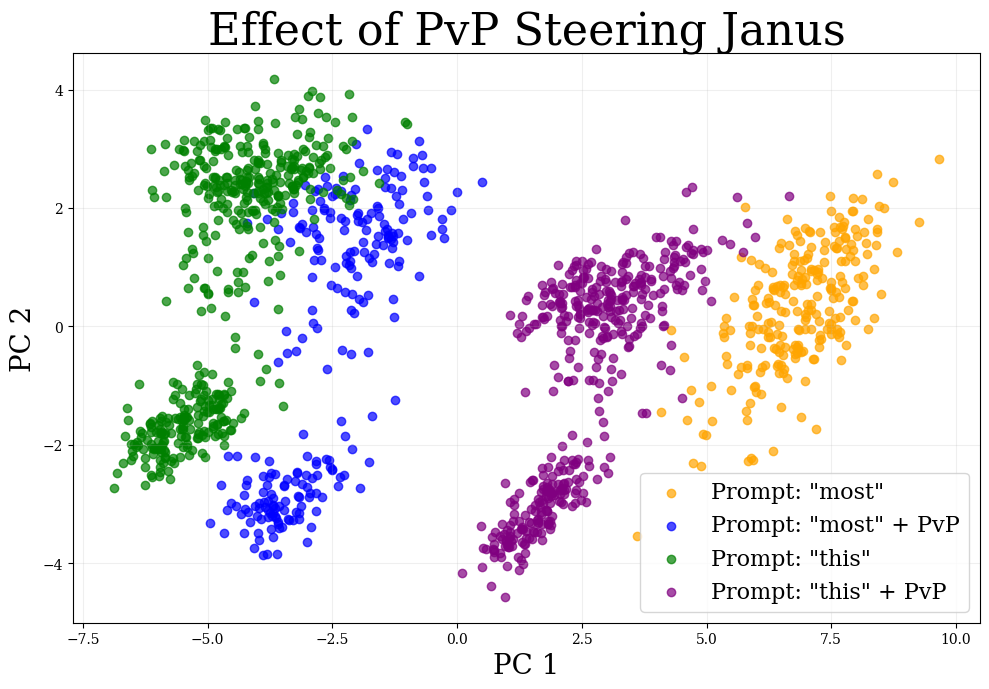

In [5]:
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model_version = 'janus'

def load_states(pickle_path, source_label):
    with open(pickle_path, 'rb') as f:
        attention_results = pickle.load(f)
    
    data, labels, sources = [], [], []

    for key, value in attention_results.items():
        tv_str, _ = key.split('_', 1)
        tv = tv_str == 'True'

        # Convert tensor to numpy
        state_tensor = value['states']  # [1, 4096]
        state_np = state_tensor.squeeze(0).to(torch.float32).detach().cpu().numpy()

        data.append(state_np)
        labels.append(tv)
        sources.append(source_label)
    
    return data, labels, sources

# Load both datasets
data1, labels1, sources1 = load_states(f'pca_states_{model_version}_color_counterfact.pickle', 'color')
data2, labels2, sources2 = load_states(f'pca_states_{model_version}_color_knowledge.pickle', 'knowledge')

# Combine all data
all_data = np.stack(data1 + data2)
all_labels = np.array(labels1 + labels2)
all_sources = np.array(sources1 + sources2)

# Run PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(all_data)

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["DejaVu Serif"]

ax_fontsize=20
title_fontsize=32
legend_fontsize=16

# Plot
plt.figure(figsize=(10, 7))
plt.grid(True, alpha=0.2)
# Masks
color_true = (all_sources == 'color') & (all_labels == True)
color_false = (all_sources == 'color') & (all_labels == False)
knowledge_true = (all_sources == 'knowledge') & (all_labels == True)
knowledge_false = (all_sources == 'knowledge') & (all_labels == False)

# Scatter
plt.scatter(data_2d[color_false, 0], data_2d[color_false, 1], color='orange', label='Prompt: "most"', alpha=0.7)
plt.scatter(data_2d[color_true, 0], data_2d[color_true, 1], color='blue', label='Prompt: "most" + PvP', alpha=0.7)
plt.scatter(data_2d[knowledge_false, 0], data_2d[knowledge_false, 1], color='green', label='Prompt: "this"', alpha=0.7)
plt.scatter(data_2d[knowledge_true, 0], data_2d[knowledge_true, 1], color='purple', label='Prompt: "this" + PvP', alpha=0.7)


# Labels
#plt.title('Effect of PvP-Steering', fontsize=title_fontsize)
plt.title(r'Effect of PvP Steering Janus', fontsize=title_fontsize)
plt.xlabel('PC 1', fontsize=ax_fontsize)
plt.ylabel('PC 2', fontsize=ax_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.tight_layout()
plt.savefig(f"steering_pca_{model_version}.png")

plt.show()